# Correlation Analysis Between Stock news and Price movement

In [16]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\liulj\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Get the working directory 
import os, sys
# current working directory
current_dir = os.getcwd()

# Get the parent directory
parent_dir = os.path.dirname(current_dir)

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

In [5]:
from scripts.financial_analysis import FinancialAnalyzer

**Load APPLE data**

In [6]:
# Define ticker and date range
ticker = 'AAPL'
data_dir = r'C:\Users\liulj\Desktop\KAIM\stock-market-data\yfinance_data'
end_date = '2024-10-7'
start_date = '1980-12-12'
apple_analyzer = FinancialAnalyzer(ticker=ticker, start_date=start_date, end_date=end_date, data_dir=data_dir)

In [7]:
apple_stock_data = apple_analyzer.retrieve_stock_data()
apple_stock_data.drop(['Dividends','Stock Splits'], axis = 1, inplace=True)
apple_stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600


**Load Sentimental data**

In [10]:
news_sentiment_data = pd.read_csv(r'C:\Users\liulj\Desktop\KAIM\stock-market-data\news_sentiment_data.csv')
news_sentiment_data.head()

,Unnamed: 0,headline,url,publisher,date,stock,hour,day,weekday,month,year,sentiment,sentiment_category
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,14.0,5.0,Friday,6.0,2020.0,0.000,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,14.0,3.0,Wednesday,6.0,2020.0,0.000,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,8.0,26.0,Tuesday,5.0,2020.0,0.000,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,16.0,22.0,Friday,5.0,2020.0,0.000,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,15.0,22.0,Friday,5.0,2020.0,0.296,Positive


**Combine The two data**

In [12]:
# Convert date columns to datetime
news_sentiment_data['date'] = pd.to_datetime(news_sentiment_data['date'])

In [14]:
# Aggregate sentiment by date
news_sentiment_data['date'] = news_sentiment_data['date'].dt.date  # Keep only the date part
sentiment_by_date = news_sentiment_data.groupby('date')['sentiment'].mean().reset_index()
sentiment_by_date.rename(columns={'date': 'Date'}, inplace=True)
sentiment_by_date['Date'] = pd.to_datetime(sentiment_by_date['Date'])

In [15]:
# Merge Apple stock data with sentiment scores
merged_df = pd.merge(apple_stock_data, sentiment_by_date, on='Date', how='inner')

In [40]:
# Calculate daily stock returns
merged_df['Daily Return'] = merged_df['Close'].pct_change()

In [41]:
# Output of merged data
merged_df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,sentiment,Daily Return
0,2011-04-28,12.363929,12.491071,12.340000,12.383929,10.457921,360959200,0.083333,NaN
1,2011-04-29,12.385000,12.641071,12.381071,12.504643,10.559862,1006345200,0.367550,0.012009
2,2011-05-02,12.490714,12.516786,12.339286,12.367143,10.443746,442713600,0.136444,-0.009832
3,2011-05-03,12.428214,12.496071,12.343571,12.435714,10.501650,313348000,0.000000,-0.001655
4,2011-05-05,12.442857,12.533929,12.358929,12.383929,10.457921,335969200,-0.042667,0.003030


**Correlation Analysis**

In [45]:
def correlation_analysis(data, col1, col2):
    corrilation = data[col1].corr(data[col2])
    return corrilation


**correlation between Sentiment and Close Value**

In [46]:
# correlation between Sentiment and Close Value
correlation_analysis(merged_df, 'sentiment', 'Close')

np.float64(-0.05475991445655013)

**correlation between Sentiment and Open Value**

In [47]:
correlation_analysis(merged_df, 'sentiment', 'Open')

np.float64(-0.052780333965461536)

In [33]:
# Perform correlation analysis for all columns
correlation_results = merged_df.corr()

# Output correlation results
print("Correlation Results:")
correlation_results

Correlation Results:


,Date,Adj Close,Close,High,Low,Open,Volume,sentiment
Date,1.000000,0.901144,0.900452,0.901642,0.900771,0.905849,-0.694329,-0.024373
Adj Close,0.901144,1.000000,0.999743,0.999732,0.999496,0.999109,-0.531120,-0.053742
Close,0.900452,0.999743,1.000000,0.999572,0.999712,0.999369,-0.526457,-0.054760
High,0.901642,0.999732,0.999572,1.000000,0.999730,0.999324,-0.536450,-0.051702
Low,0.900771,0.999496,0.999712,0.999730,1.000000,0.999613,-0.531616,-0.052794
Open,0.905849,0.999109,0.999369,0.999324,0.999613,1.000000,-0.534351,-0.052780
Volume,-0.694329,-0.531120,-0.526457,-0.536450,-0.531616,-0.534351,1.000000,-0.026431
sentiment,-0.024373,-0.053742,-0.054760,-0.051702,-0.052794,-0.052780,-0.026431,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

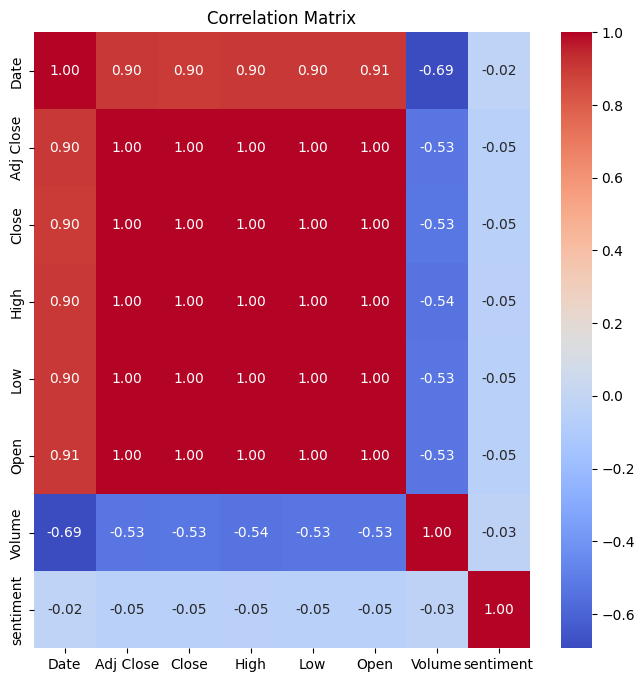

In [51]:
# Seaborn heatmap for correlation matrix
fig, ax = plt.subplots(figsize = (8,8))
sns.heatmap(correlation_results, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')

## Visualization

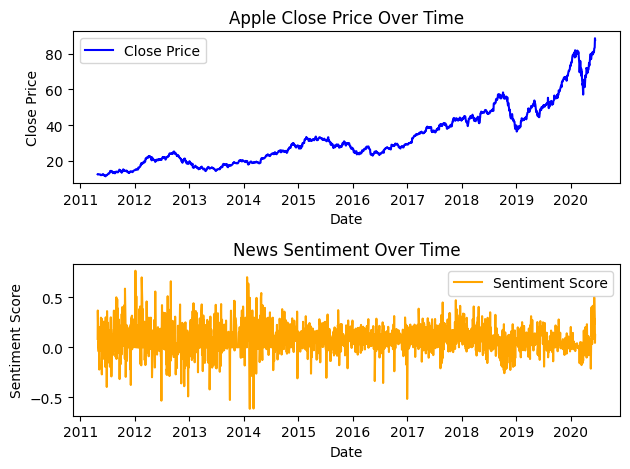

In [48]:
# Plot stock prices
plt.subplot(2, 1, 1)
plt.plot(merged_df['Date'], merged_df['Close'], label='Close Price', color='blue')
plt.title('Apple Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Plot sentiment scores
plt.subplot(2, 1, 2)
plt.plot(merged_df['Date'], merged_df['sentiment'], label='Sentiment Score', color='orange')
plt.title('News Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()

plt.tight_layout()
plt.show()
